# Customer Churn Prediction Using ANN

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading a CSV file
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Dropping customer ID since it won't be necessary for further computation
df.drop('customerID', axis='columns', inplace= True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Converting TotalCharges column into numeric since it's a string
pd.to_numeric(df.TotalCharges, errors='coerce').isnull().sum() #Coerce will ignore the null values in the column and replace it by NA

11

In [6]:
# Dropping the 11 rows which doesn't have TotalCharges
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df1 = df[df.TotalCharges != ' ']

In [8]:
df1.TotalCharges.isnull().sum()

0

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\rocky\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

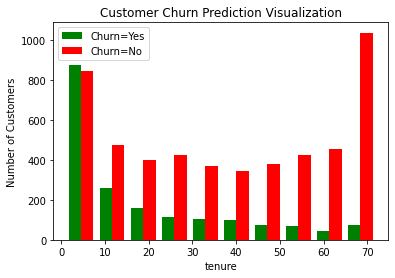

In [12]:
# Seperating all customers based on churn(not leaving) and tenur(for how many months a customer is present)
tenure_no_churn = df1[df1.Churn == 'No'].tenure
tenure_yes_churn = df1[df1.Churn == 'Yes'].tenure


plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_yes_churn, tenure_no_churn],color = ['green','red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

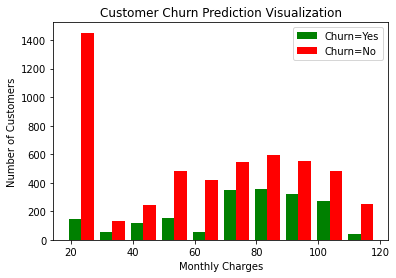

In [13]:
# Seperating all customers based on churn(not leaving) and monthly charges
mc_no_churn = df1[df1.Churn == 'No'].MonthlyCharges
mc_yes_churn = df1[df1.Churn == 'Yes'].MonthlyCharges


plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([mc_yes_churn, mc_no_churn],color = ['green','red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

In [14]:
# Creating a function to print all the columns whose datatype is object
def print_uniuq_col_values(df):
    for column in df:
        if df[column].dtypes== 'object':
            print(f'{column}:{df[column].unique()}')

In [15]:
print_uniuq_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
# Replacing some of the values with'NO' which are associated with other words
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

C:\Users\rocky\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
print_uniuq_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [18]:
# Replacing all the columns of Yes and No with 0 nd 1
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV',
              'StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\rocky\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [20]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [21]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
# One-hot-encoding the remaining columns since it has got multiple values
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [24]:
# Scaling the columns for deep learning process
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [25]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4531,0,0,1,1,0.112676,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
52,1,1,1,0,0.338028,1,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3233,0,1,1,0,0.042254,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [26]:
# Splitting data into X and y
X =df2.drop('Churn',axis='columns')
y = df2['Churn']

In [27]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=5)

In [28]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [29]:
import tensorflow as tf

In [30]:
# Create the model using sequenial API
model = tf.keras.Sequential([
tf.keras.layers.Dense(20, input_shape=(26,), activation='relu'), 
tf.keras.layers.Dense(10, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid'),

])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 5s 4ms/step - loss: 0.4983 - accuracy: 0.7403
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.7696
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4275 - accuracy: 0.7906
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4220 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.7993
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8030
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8021
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8027
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4089 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4076 - accura

In [31]:
# Evaluating the model
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.7783


[0.4852737486362457, 0.778251588344574]

In [32]:
y_pred = model.predict(X_test)
y_pred , y_test

(array([[0.25752652],
        [0.30436718],
        [0.00930548],
        ...,
        [0.74968034],
        [0.68135905],
        [0.79632497]], dtype=float32),
 2660    0
 744     0
 5579    1
 64      1
 3287    1
        ..
 2024    0
 4396    1
 4081    1
 1297    0
 4899    1
 Name: Churn, Length: 1407, dtype: int64)

In [33]:
# Converting y_pred values into 0 <0.5 and 1 >0.5
y_predict = []
for elements in y_pred:
    if elements > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [34]:
y_predict[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [35]:
# Printing a CLassification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(42.0, 0.5, 'Truth')

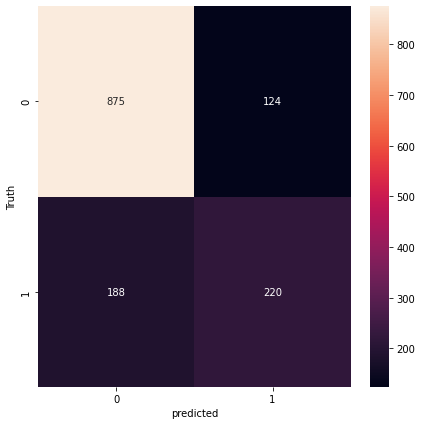

In [36]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_predict)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')